# Convolutional Neural Network
- the ultimate concept is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy.

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.models.Sequential([
                                    
 # Add convolutions and max pooling                                  
 tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

Instead of the input layer at the top, you added a Conv2D layer. The parameters are:
1. The number of convolutions you want to generate. (2의 제곱승 넣는 것이 좋다.)
2. The size of Convolution.
3. The activation function to use.
4. In the first layer, the shape of the input data. 

You'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution.
Conv레이어 다음, 컨볼루션 레이어에서 추출한 특징은 유지하면서, 이미지를 compress하는 MaxPool2D를 사용함
- MaxPooling 사이즈가 (2, 2)라는 건 이미지 크기를 1/4 하는 것과 같음
- 2x2 영역에서 가장 큰 픽셀의 값을 고름
- Thus, it turns 4 pixels into 1.

# About overfitting
epoch을 약 20이상 돌리면 결과는 좋아보이나, 오버피팅이 발생해서 validation results가 떨어진다.
- In a nutshell, overfitting occurs when the network learns the data from the training set really well
- 훈련용 데이터에 너무 specialised 돼서, unseen data에 대해서는 결과가 안좋게 나옴

# Visualizing the Convolutions and Pooling

In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


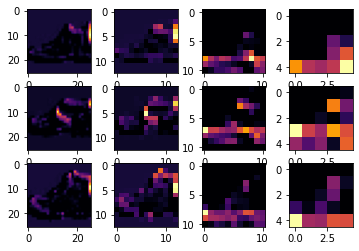

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs= model.input, outputs = layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES
Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

Remove the final Convolution. What impact will this have on accuracy or training time?

How about adding more Convolutions? What impact do you think this will have? Experiment with it.

Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.